In [1]:
from utils import *

## Premiers modèles 

### Modèle linéaire

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
model = LinearRegression()

In [4]:
X_result,Y_test,score = train_and_eval(model,X,Y)
score

[0.31574628488630574, 0.71803906366799]

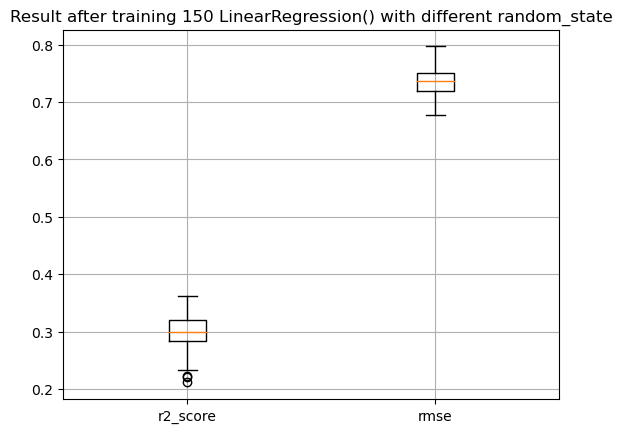

In [5]:
value = multi_test(model,X,Y,n=150)

### Regression Logistique

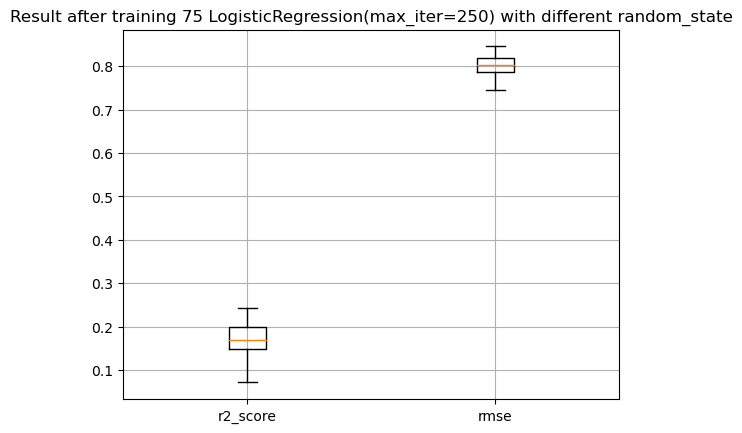

In [10]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=250)
value = multi_test(logistic_model,X,Y,n=75)

In [112]:
submission_model = train_and_eval(logistic_model,X,Y,full_train=True)
data_test = pd.read_csv("Data\wine_test.csv", index_col=0)
test = submission(submission_model,X,data_test,name_file="logistic_soumission.csv")

### SVM

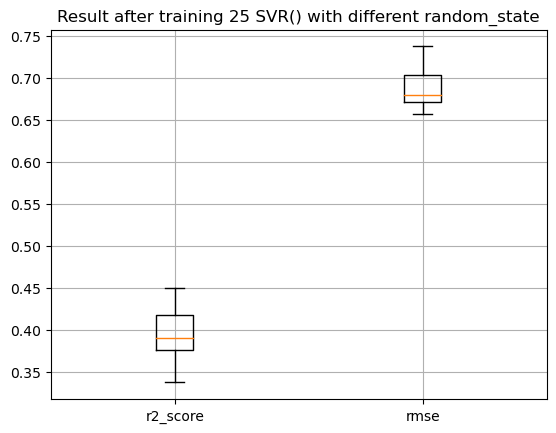

In [40]:
from sklearn import svm
svm_model = svm.SVR()
value = multi_test(svm_model,X,Y,n=25)

In [11]:
from sklearn import svm
svm_model = svm.SVR()
submission(svm_model,name_file = "Soumissions/svm_soumission.csv")

,wine_ID,target
0,5316,5.836451
1,5210,5.136610
2,3518,6.112010
3,1622,4.736397
4,2443,5.228315
...,...,...
1945,6277,6.079256
1946,3035,6.214019
1947,3410,6.005678
1948,6099,5.941801


### RandomForest

In [17]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(500)
value = multi_test(forest_model,X,Y,n=25)

KeyboardInterrupt: 

In [135]:
forest_scores = [train_and_eval(forest_model,X,Y,random_state=k)[2] for k in range(50)]
scores_r2 = [forest_scores[i][0] for i in range(len(forest_scores))]
scores_rmse = [forest_scores[i][1] for i in range(len(forest_scores))]
all_scores = [scores_r2,scores_rmse]

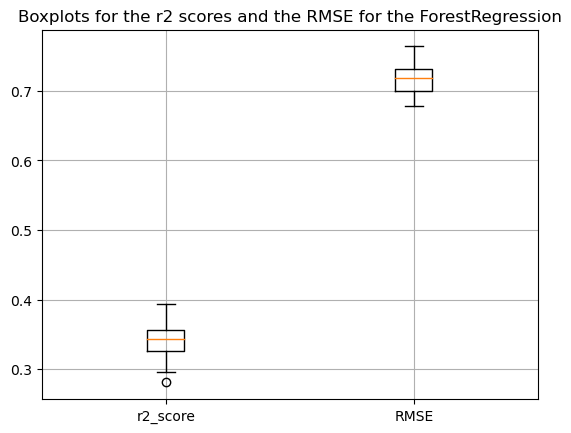

In [136]:
plt.boxplot(all_scores,labels=["r2_score","RMSE"])
plt.grid()
plt.title("Boxplots for the r2 scores and the RMSE for the ForestRegression")
plt.show()

In [146]:
submission_model = train_and_eval(forest_model,X,Y,full_train=True)
test = submission(submission_model,name_file="forest_soumission.csv")

### K Voisins

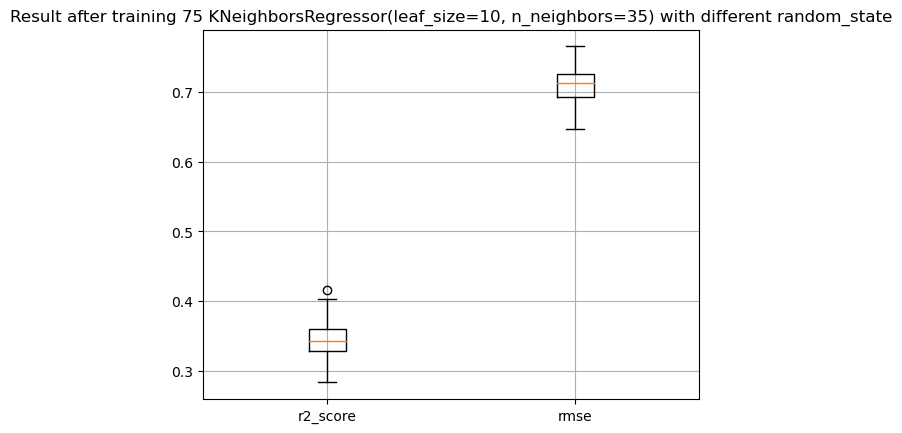

In [9]:
from sklearn.neighbors import KNeighborsRegressor
neighbor_model = KNeighborsRegressor(n_neighbors=35,leaf_size=10)
value = multi_test(neighbor_model,X,Y,n=75)

In [3]:
submission(neighbor_model,X,data_test,name_file = "neighbor_soumission.csv")

,wine_ID,target
0,5316,5.84
1,5210,5.36
2,3518,5.64
3,1622,5.20
4,2443,5.24
...,...,...
1945,6277,5.88
1946,3035,6.24
1947,3410,5.96
1948,6099,6.20


### Gradient Boosting

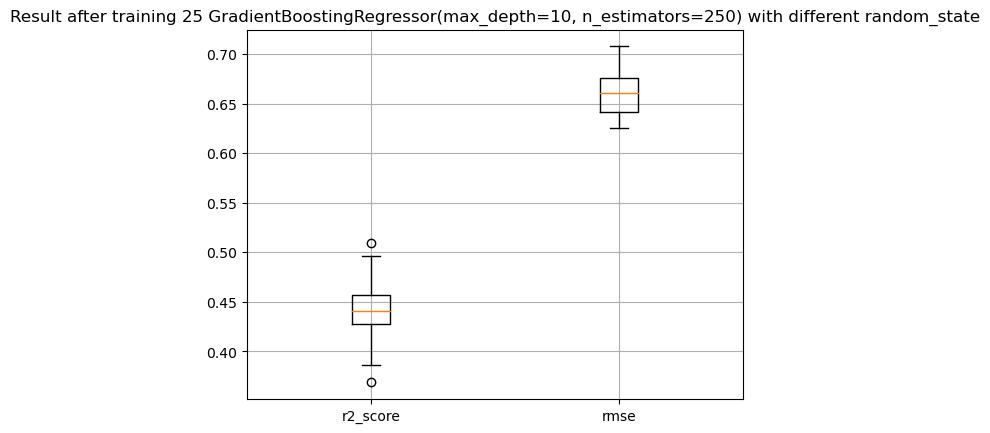

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=250,max_depth=10)
value = multi_test(boosting_model,X,Y,n=25)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=250,max_depth=10)
submission(boosting_model,name_file = "Soumissions/boosting_soumission.csv")

,wine_ID,target
0,5316,6.403561
1,5210,5.159108
2,3518,5.847853
3,1622,4.861024
4,2443,5.071994
...,...,...
1945,6277,6.024016
1946,3035,6.187617
1947,3410,5.932697
1948,6099,6.161376
